In [62]:
# Import of keras model and hidden layers for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout

#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# data visualisation and manipulation
import matplotlib.pyplot as plt
from matplotlib import style

#Initialize a list of paths for images
imagepaths = []

import os
for dirname, _, filenames in os.walk(r'C:\Users\Prabh\Desktop\pothole-detection-dataset'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

print(len(imagepaths))

681


In [63]:
IMG_SIZE=128
X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('C:\\Users\\Prabh\\Desktop\\pothole-detection-dataset\\normal\\')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

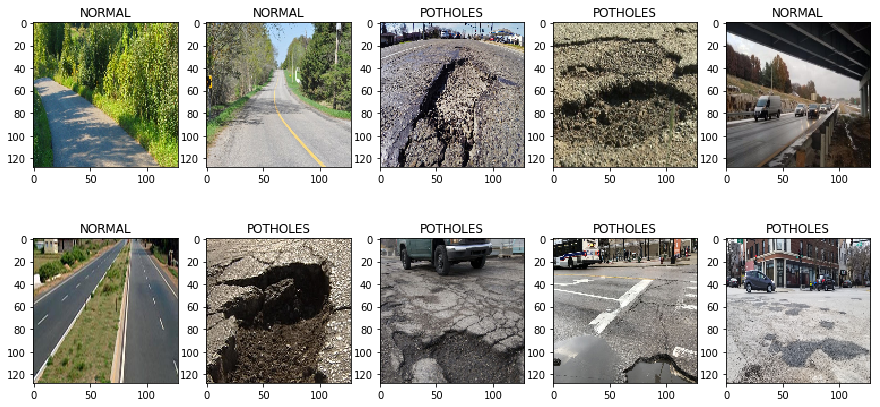

In [64]:
import random as rn
fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [65]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [85]:
# Create a CNN Sequential Model
model = Sequential()

model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [86]:
#Model configuration for training purpose
adam= tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [87]:
print(model.summary())

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_85 (Conv2D)           (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_85 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_87 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 12, 12, 128)     

In [88]:
history=model.fit(x_train, y_train, epochs=50, batch_size=12, verbose=2, 
         validation_data=(x_test, y_test))

Train on 340 samples, validate on 340 samples
Epoch 1/50
340/340 - 25s - loss: 4.0350 - acc: 0.5147 - val_loss: 0.6395 - val_acc: 0.5853
Epoch 2/50
340/340 - 22s - loss: 0.7119 - acc: 0.5912 - val_loss: 0.6504 - val_acc: 0.6382
Epoch 3/50
340/340 - 22s - loss: 0.5758 - acc: 0.6971 - val_loss: 0.5941 - val_acc: 0.6265
Epoch 4/50
340/340 - 23s - loss: 0.5533 - acc: 0.7265 - val_loss: 0.6076 - val_acc: 0.7176
Epoch 5/50
340/340 - 20s - loss: 0.4255 - acc: 0.8118 - val_loss: 0.4074 - val_acc: 0.8176
Epoch 6/50
340/340 - 22s - loss: 0.4290 - acc: 0.8000 - val_loss: 0.4526 - val_acc: 0.7824
Epoch 7/50
340/340 - 22s - loss: 0.3737 - acc: 0.8412 - val_loss: 3.3160 - val_acc: 0.4765
Epoch 8/50
340/340 - 22s - loss: 0.7210 - acc: 0.6706 - val_loss: 0.6994 - val_acc: 0.5794
Epoch 9/50
340/340 - 24s - loss: 0.4875 - acc: 0.7706 - val_loss: 1.2119 - val_acc: 0.5529
Epoch 10/50
340/340 - 23s - loss: 0.5822 - acc: 0.7412 - val_loss: 0.5755 - val_acc: 0.7118
Epoch 11/50
340/340 - 22s - loss: 0.4461 - 

In [89]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy: {:2.2f}%'.format(accuracy*100))
print('Test loss: {:2.2f}%'.format(loss*100))

340/340 [==============================] - 5s 14ms/sample - loss: 0.6100 - acc: 0.8412
Test accuracy: 84.12%
Test loss: 61.00%


In [90]:
# Making predictions on test data
prediction = model.predict(x_test)
#Transform predictions into 1D array 
y_pred = np.argmax(prediction, axis=1)
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)    
        
#Create a Confusion Matrix for Evaluation
# H = Horizontal
# V = Vertical
pd.DataFrame(confusion_matrix(y_test2, y_pred),columns=["Predicted NORMAL", "Predicted POTHOLES"],index=["Actual NORMAL", "Actual POTHOLES"])

,Predicted NORMAL,Predicted POTHOLES
Actual NORMAL,152,12
Actual POTHOLES,42,134


Train on 612 samples, validate on 68 samples
Epoch 1/3
612/612 - 33s - loss: 11.8323 - acc: 0.6830 - val_loss: 0.3557 - val_acc: 0.8824
Epoch 2/3
612/612 - 32s - loss: 0.4925 - acc: 0.7761 - val_loss: 0.4360 - val_acc: 0.8382
Epoch 3/3
612/612 - 31s - loss: 0.3796 - acc: 0.8333 - val_loss: 1.2206 - val_acc: 0.6176
68/68 [==============================] - 1s 14ms/sample - loss: 1.2206 - acc: 0.6176
Train on 544 samples, validate on 136 samples
Epoch 1/3
544/544 - 38s - loss: 9.0984 - acc: 0.7077 - val_loss: 0.4256 - val_acc: 0.8015
Epoch 2/3
544/544 - 34s - loss: 0.3941 - acc: 0.8401 - val_loss: 0.3352 - val_acc: 0.8309
Epoch 3/3
544/544 - 29s - loss: 0.3678 - acc: 0.8695 - val_loss: 0.4075 - val_acc: 0.7941
136/136 [==============================] - 2s 13ms/sample - loss: 0.4075 - acc: 0.7941
Train on 476 samples, validate on 204 samples
Epoch 1/3
476/476 - 27s - loss: 30.0689 - acc: 0.6429 - val_loss: 0.6119 - val_acc: 0.7206
Epoch 2/3
476/476 - 31s - loss: 0.4364 - acc: 0.7941 - val_

Text(0, 0.5, 'accuracy')

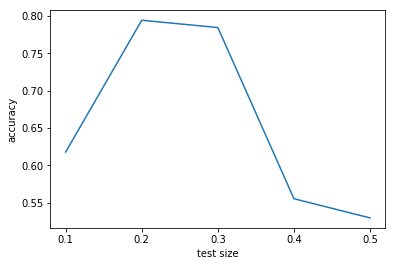

In [93]:
r2=[]
k=[0.1,0.2,0.3,0.4,0.5]

for i in k:
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=i,random_state=5)
    model = Sequential()

    model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(64, (3, 3), activation='relu')) 
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu')) 
    model.add(MaxPooling2D((2, 2)))

    model.add(Flatten())

    model.add(Dropout(0.4))

    model.add(Dense(128, activation='relu'))

    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=3, batch_size=12, verbose=2, 
             validation_data=(x_test, y_test))
    loss, accuracy = model.evaluate(x_test, y_test)
    r2.append(accuracy)
    
plt.plot(k,r2)
plt.xticks(k)
plt.xlabel("test size")
plt.ylabel("accuracy")

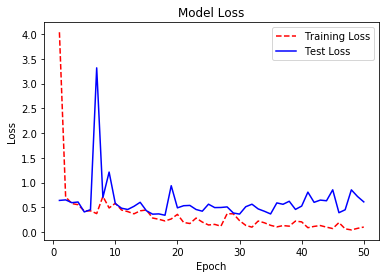

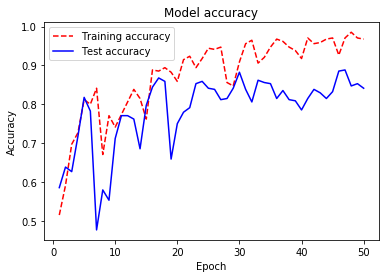

In [92]:

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

training_acc = history.history['acc']
test_acc = history.history['val_acc']
epoch_count = range(1, len(training_acc) + 1)
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, test_acc, 'b-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy', 'Test accuracy'])
plt.show()